In [2]:
from q2.tim_sort import tim_sort

import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt

from copy import copy
import tqdm.notebook as tq
import time
import random  

random.seed(4444)

In [5]:
df = pd.read_csv('q3.csv')
df

,n,ordered_time,unordered_time
0,10,2150,2970
1,100,17300,19380
2,1000,209430,170971
3,10000,2581713,1742052
4,100000,30211636,18579501
5,1000000,372562775,175618615
6,10000000,4200364962,1796884204


In [11]:
4200364962/1796884204

2.337582440009028

<AxesSubplot:xlabel='n', ylabel='Time to insert n elements (ns)'>

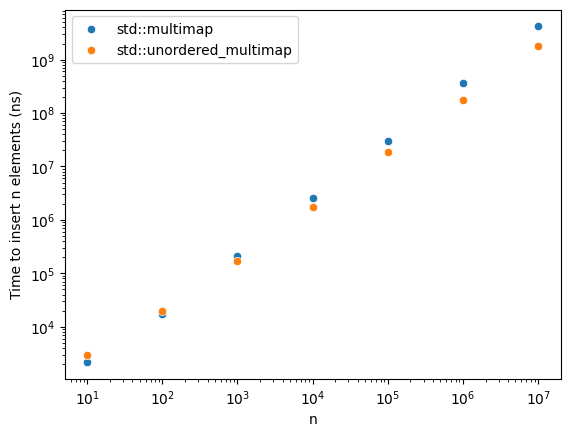

In [10]:
plt.xscale('log')
plt.yscale('log')
plt.xlabel("n")
plt.ylabel("Time to insert n elements (ns)")


sns.scatterplot(df, x='n', y='ordered_time', label='std::multimap')
sns.scatterplot(df, x='n', y='unordered_time', label='std::unordered_multimap')

In [100]:
df_tim_2.to_csv('q2-df_tim_2.csv')

<AxesSubplot:xlabel='n', ylabel='tim_sort_time'>

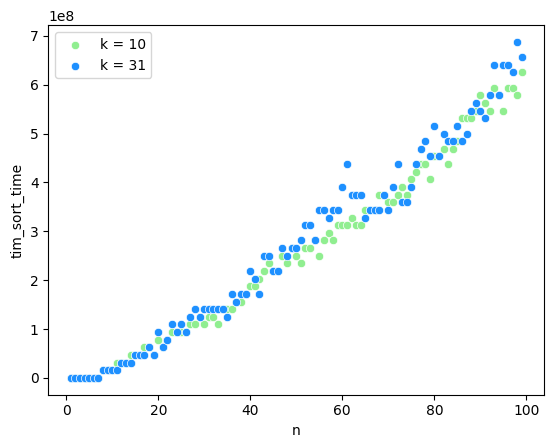

In [102]:
sns.scatterplot(df_tim_2[df_tim_2['k'] == 10], x='n', y='tim_sort_time', color='lightgreen', label='k = 10')
sns.scatterplot(df_tim_2[df_tim_2['k'] == 31], x='n', y='tim_sort_time', color='dodgerblue', label='k = 31')


In [4]:
df = pd.read_csv('q1.csv')

In [5]:
# fit merge_sort against n log n regression using least squares
# adapted from https://stackoverflow.com/a/3433503
merge_sort_params, _ = scipy.optimize.curve_fit(lambda t, a, b: a + b * t * np.log(t), df['n'], df['merge_sort_time'])

In [6]:
# fit insertion_sort to a 2nd degree polynomial
insertion_sort_params = np.polyfit(df['n'], df['insertion_sort_time'], 2)

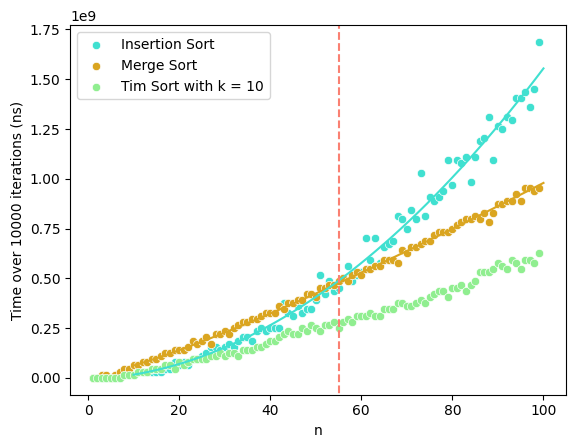

In [107]:
sns.scatterplot(df, x='n', y='insertion_sort_time', color='turquoise', label='Insertion Sort')
sns.scatterplot(df, x='n', y='merge_sort_time', color='goldenrod', label='Merge Sort')
sns.scatterplot(df_tim_2[df_tim_2['k'] == 10], x='n', y='tim_sort_time', color='lightgreen', label='Tim Sort with k = 10')

# draw merge_sort fit
t = np.linspace(10, 100)
y = merge_sort_params[0] + merge_sort_params[1] * t * np.log(t)
sns.lineplot(x=t, y=y, color='goldenrod')

# draw insertion_sort fit
y = insertion_sort_params[0] * t**2 + insertion_sort_params[1] * t + insertion_sort_params[2]
sns.lineplot(x=t, y=y, color='turquoise')

plt.xlabel("n")
plt.ylabel("Time over 10000 iterations (ns)")

# approximatge intersection manually and graph it
plt.axvline(55, 10, 0, color='salmon', ls='--')